# Tonian carbon isotope composite

This Jupyter notebook (developed using an Python 3 kernel) contains the carbon isotope composite presented in Swanson-Hysell et al. (2015): 

Swanson-Hysell, N.L., Maloof, A.C., Condon, D.J., Jenkin, G.R.T., Alene, M., Tremblay, M.M., Tesema, T., Rooney, A.D. and Haileab, B. Stratigraphy and geochronology of the Tambien Group, Ethiopia: Evidence for globally synchronous carbon isotope change in the Neoproterozoic.  Geology, (2015), doi:10.1130/G36347.1.

<a href="http://escholarship.org/uc/item/0xw606vp">open access archive </a>| <a href="http://geology.gsapubs.org/content/early/2015/02/26/G36347.1.abstract">link to journal page</a> | <a title="Tambien Media Release Paragraph" href="http://www.swanson-hysell.org/publications/tambien-media-release-paragraph/">non-technical summary</a><br />

In that manuscript, new carbon isotope data and U-Pb dates are presented from the Tambien Group of northern Ethiopia. These data are used to constrain a composite carbon isotope curve that also contains data from other basins which was presented in Fig 2c. Figure 2 of Swanson-Hysell et al. (2015) is reproduced below:

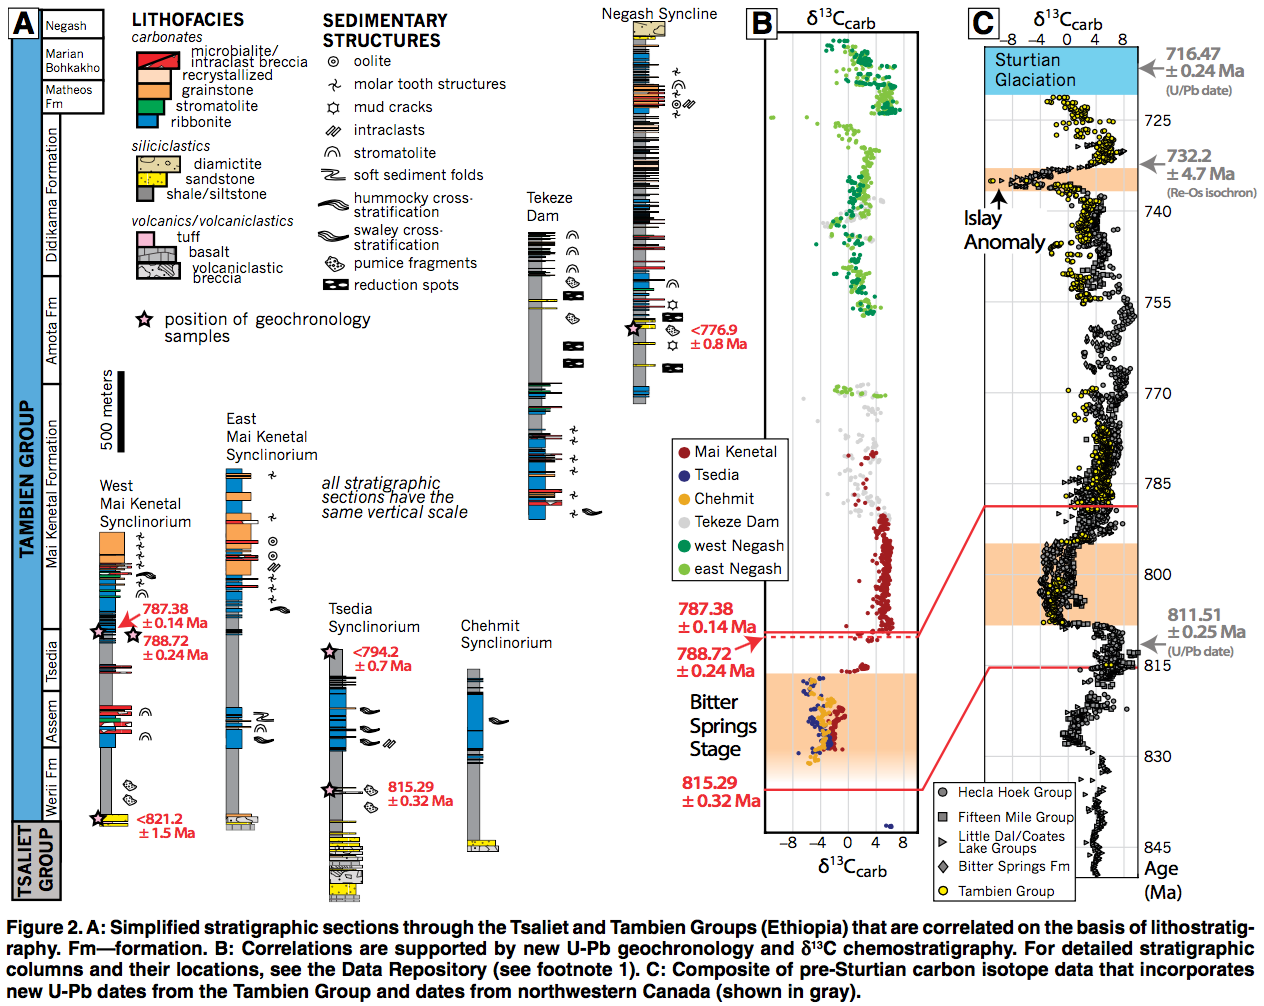

In [1]:
from IPython.display import Image
Image(filename='Swanson-Hysell_et_al_2015/Figure_2.png',width=700) 

## Import modules

This code uses functions from modules that are core packages of scientific python (http://scipy.org/). 

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_rows', 1000)
import matplotlib.pyplot as plt
%matplotlib inline

## Age model parameters

The composite $\delta^{13}\mathrm{C}$ curve presented above and developed below uses the following dates to construct the age model. Some of these dates correspond to events that are taken to be correlateable chronostratigraphic markers (e.g. the initiation of Sturtian Glaciation and the start of the Bitter Springs Stage). Others are specific to a given basin. In some cases these dates are well-constrained with data. For example, at meter level 1202 in the T1 section there is a U-Pb date of 787.38 ± 0.14 Ma which is used as the constraint. In other cases, the age constraints are poor and are choosen such that they are consistent with broad existing constraints and the rest of the composite (e.g. the base of the Akademikerbreen Group data). 

In [3]:
#Tambien specific parameters
T6_date = 815 #TBD with a date currently arbitrary and set to be same as TS22
T1_0 = 807.9 #would be 807.9 if strictly based on interpolation between TS22 and T1-1202 dates, 
#but interesting to consider if the BSS caused carbonate sedimentation to occur in Tambien
T1_1202 = 787.4 #U-Pb date of 787.38 ± 0.14 Ma 

BSS_start = 809.5
BSS_end = 794.6 #age based on interpolation between TS22 and T1-1202 dates

Ombombo_tuff = 759.3 #dated ash in the Ombombo Group 759.3+/-1.3 at +6 d13C values

Islay_d13C_nadir = 735
Islay_d13C_0 = 733 #Re-Os date of 732+/-4 (Rooney et al., 2013)
Sturtian_initiation = 721

#Akademikerbreen specific parameters
Akadem_base = 825

#Fifteen Mile specific parameters
Fifteenmile_base = 828
Fifteenmile_date = 811.5
PF1_top = 770
PF3_bottom = 753

## Tambien Group data (Swanson-Hysell et al., 2015)

Plot data against meter level and develop the age model for data from the Tambien Group of northern Ethiopia published in:

Swanson-Hysell, N.L., Maloof, A.C., Condon, D.J., Jenkin, G.R.T., Alene, M., Tremblay, M.M., Tesema, T., Rooney, A.D. and Haileab, B. Stratigraphy and geochronology of the Tambien Group, Ethiopia: Evidence for globally synchronous carbon isotope change in the Neoproterozoic. Geology, (2015), doi:10.1130/G36347.1

In [4]:
Tambien_data = pd.read_csv('./Composite_Data/Tambien.csv')
Tambien_data.head()

,section,strat_height,d13C,d18O,strat_m,note
0,T6,34.7,6.21,-16.18,-465.3,NaN
1,T6,35.7,6.00,-15.30,-464.3,NaN
2,T6,37.2,6.06,-14.19,-462.8,NaN
3,T6,38.0,5.97,-15.94,-462.0,NaN
4,T6,41.0,6.16,-14.69,-459.0,NaN


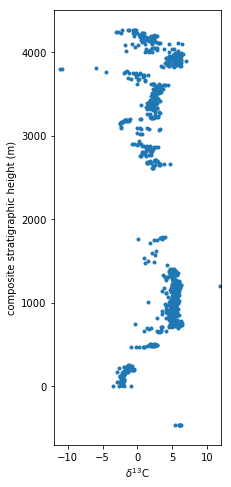

In [5]:
plt.figure(figsize=(3,8))
plt.scatter(Tambien_data['d13C'],Tambien_data['strat_m'],marker='.')
plt.xlim(-12,12)
plt.xlabel('$\delta^{13}\mathrm{C}$')
plt.ylabel('composite stratigraphic height (m)')
plt.show()

In [6]:
Tambien_data['age'] = 'NaN'
Tambien_data['age'][0] = T6_date
Tambien_data['age'][7] = T1_0
Tambien_data['age'][223] = T1_1202
Tambien_data['age'][911] = Islay_d13C_nadir
Tambien_data['age'][912] = Islay_d13C_nadir-3
Tambien_data['age'][1069] = Sturtian_initiation

Tambien_sedrate1 = -(Tambien_data['strat_m'][7]-Tambien_data['strat_m'][0])/(Tambien_data['age'][7]-Tambien_data['age'][0])
Tambien_sedrate2 = -(Tambien_data['strat_m'][223]-Tambien_data['strat_m'][7])/(Tambien_data['age'][223]-Tambien_data['age'][7])
Tambien_sedrate3 = -(Tambien_data['strat_m'][911]-Tambien_data['strat_m'][223])/(Tambien_data['age'][911]-Tambien_data['age'][223])
Tambien_sedrate4 = -(Tambien_data['strat_m'][1069]-Tambien_data['strat_m'][912])/(Tambien_data['age'][1069]-Tambien_data['age'][912])
print(Tambien_sedrate1 , Tambien_sedrate2, Tambien_sedrate3, Tambien_sedrate4)

65.53521126760542 35.2 58.81297709923667 40.981818181818156


In [7]:
for n in range (1,7):
    meter_diff = Tambien_data['strat_m'][n]-Tambien_data['strat_m'][n-1]
    age_diff = (1/Tambien_sedrate1)*meter_diff
    Tambien_data['age'][n]=Tambien_data['age'][n-1]-age_diff
for n in range (8,223):
    meter_diff = Tambien_data['strat_m'][n]-Tambien_data['strat_m'][n-1]
    age_diff = (1/Tambien_sedrate2)*meter_diff
    Tambien_data['age'][n]=Tambien_data['age'][n-1]-age_diff
for n in range (224,911):
    meter_diff = Tambien_data['strat_m'][n]-Tambien_data['strat_m'][n-1]
    age_diff = (1/Tambien_sedrate3)*meter_diff
    Tambien_data['age'][n]=Tambien_data['age'][n-1]-age_diff
for n in range (913,1069):
    meter_diff = Tambien_data['strat_m'][n]-Tambien_data['strat_m'][n-1]
    age_diff = (1/Tambien_sedrate4)*meter_diff
    Tambien_data['age'][n]=Tambien_data['age'][n-1]-age_diff
Tambien_data.tail()

,section,strat_height,d13C,d18O,strat_m,note,age
1065,T30,88.0,-0.15,-10.12,4263.0,NaN,721.29
1066,T30,88.7,-1.25,-11.76,4263.7,NaN,721.273
1067,T30,89.4,-0.56,-12.03,4264.4,NaN,721.256
1068,T30,89.9,-2.16,-10.24,4264.9,NaN,721.244
1069,T30,99.9,NaN,NaN,4274.9,base of diamict,721


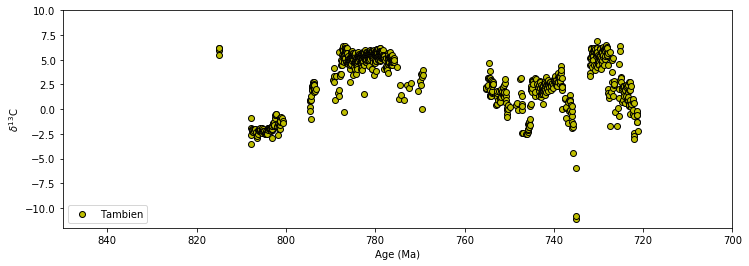

In [8]:
plt.figure(figsize=(12,4))
plt.scatter(Tambien_data['age'],Tambien_data['d13C'],
            facecolor='y',edgecolor='k',label='Tambien')
plt.xlim(850,700)
plt.ylim(-12,10)
plt.ylabel('$\delta^{13}\mathrm{C}$')
plt.xlabel('Age (Ma)')
plt.legend(loc=3)
plt.show()

In [9]:
Tambien_data.to_csv('Composite_Data/Tambien_ages.csv')

## Akademikerbreen Group data (Halverson et al., 2007a, Halverson et al., 2007d)

Plot data against meter level and develop the age model for data from the Akademikerbreen Group of Svalbard published in:

Halverson, G. P., Maloof, A. C., Schrag, D. P., Dudas, F. O., and Hurtgen, M., 2007, Stratigraphy and geochemistry of a ca 800 Ma negative carbon isotope interval in northeastern Svalbard: Chemical Geology, v. 237, n. 1–2, p. 5–27, doi: 10.1016/j.chemgeo.2006.06.013.

Halverson, G.P., Dudás, F.O., Maloof, A.C., and Bowring, S.A., 2007, Evolution of the 87Sr/86Sr composition of Neoproterozoic seawater: Palaeogeography, Palaeoclimatology, Palaeoecology, v. 256, p. 103–129, doi: 10.1016/j.palaeo.2007.02.028.

In [10]:
Akadem_data = pd.read_csv('./Composite_Data/Akademikerbreen.csv')
Akadem_data.head()

,sample,formation,strat_m,87Sr_86Sr,87Sr_86Sr_selected,d13C,d18O,Mn_ppm,Sr_ppm,Mn/Sr,Mg/Ca,d13C_Srdata
0,NaN,Grusdievbreen,0.0,NaN,NaN,0.8,NaN,NaN,NaN,NaN,NaN,There appears to be a slight discrepancy betwe...
1,NaN,Grusdievbreen,3.5,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Grusdievbreen,11.8,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Grusdievbreen,14.4,NaN,NaN,2.7,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Grusdievbreen,23.7,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN


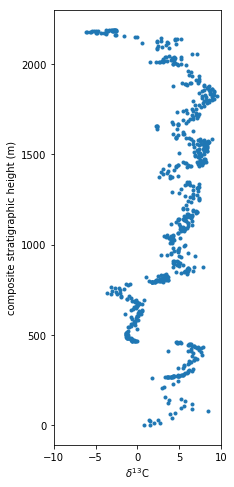

In [11]:
plt.figure(figsize=(3,8))
plt.scatter(Akadem_data['d13C'],Akadem_data['strat_m'],marker='.')
plt.xlim(-10,10)
plt.xlabel('$\delta^{13}\mathrm{C}$')
plt.ylabel('composite stratigraphic height (m)')
plt.show()

In [12]:
Akadem_data['age'] = 'NaN'
Akadem_data['age'][0] = Akadem_base
Akadem_data['age'][88] = BSS_start
Akadem_data['age'][221] = BSS_end
Akadem_data['age'][582] = Ombombo_tuff-3
Akadem_data['age'][679] = Islay_d13C_nadir
Akadem_data['age'][701] = Islay_d13C_nadir-1.5

Ak_sed_rate1 = -(Akadem_data['strat_m'][88]-Akadem_data['strat_m'][0])/(Akadem_data['age'][88]-Akadem_data['age'][0])
Ak_sed_rate2 = -(Akadem_data['strat_m'][221]-Akadem_data['strat_m'][88])/(Akadem_data['age'][221]-Akadem_data['age'][88])
Ak_sed_rate3 = -(Akadem_data['strat_m'][582]-Akadem_data['strat_m'][221])/(Akadem_data['age'][582]-Akadem_data['age'][221])
Ak_sed_rate4 = -(Akadem_data['strat_m'][679]-Akadem_data['strat_m'][582])/(Akadem_data['age'][679]-Akadem_data['age'][582])
Ak_sed_rate5 = -(Akadem_data['strat_m'][701]-Akadem_data['strat_m'][679])/(Akadem_data['age'][701]-Akadem_data['age'][679])
print(Ak_sed_rate1, Ak_sed_rate2, Ak_sed_rate3, Ak_sed_rate4, Ak_sed_rate5)

28.032258064516128 24.020134228187956 27.66318537859003 15.347417840375623 7.0


In [13]:
for n in range (1,88):
    meter_diff = Akadem_data['strat_m'][n]-Akadem_data['strat_m'][n-1]
    age_diff = (1/Ak_sed_rate1)*meter_diff
    Akadem_data['age'][n]=Akadem_data['age'][n-1]-age_diff
for n in range (89,221):
    meter_diff = Akadem_data['strat_m'][n]-Akadem_data['strat_m'][n-1]
    age_diff = (1/Ak_sed_rate2)*meter_diff
    Akadem_data['age'][n]=Akadem_data['age'][n-1]-age_diff
for n in range (222,582):
    meter_diff = Akadem_data['strat_m'][n]-Akadem_data['strat_m'][n-1]
    age_diff = (1/Ak_sed_rate3)*meter_diff
    Akadem_data['age'][n]=Akadem_data['age'][n-1]-age_diff
for n in range (583,679):
    meter_diff = Akadem_data['strat_m'][n]-Akadem_data['strat_m'][n-1]
    age_diff = (1/Ak_sed_rate4)*meter_diff
    Akadem_data['age'][n]=Akadem_data['age'][n-1]-age_diff
for n in range (680,701):
    meter_diff = Akadem_data['strat_m'][n]-Akadem_data['strat_m'][n-1]
    age_diff = (1/Ak_sed_rate5)*meter_diff
    Akadem_data['age'][n]=Akadem_data['age'][n-1]-age_diff

In [14]:
Akadem_data.head()

,sample,formation,strat_m,87Sr_86Sr,87Sr_86Sr_selected,d13C,d18O,Mn_ppm,Sr_ppm,Mn/Sr,Mg/Ca,d13C_Srdata,age
0,NaN,Grusdievbreen,0.0,NaN,NaN,0.8,NaN,NaN,NaN,NaN,NaN,There appears to be a slight discrepancy betwe...,825
1,NaN,Grusdievbreen,3.5,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,824.875
2,NaN,Grusdievbreen,11.8,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,824.579
3,NaN,Grusdievbreen,14.4,NaN,NaN,2.7,NaN,NaN,NaN,NaN,NaN,NaN,824.486
4,NaN,Grusdievbreen,23.7,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,824.155


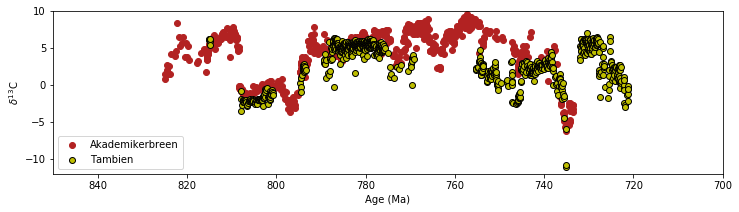

In [15]:
plt.figure(figsize=(12,3))
plt.scatter(Akadem_data['age'],Akadem_data['d13C'],
            c='Firebrick',label='Akademikerbreen')
plt.scatter(Tambien_data['age'],Tambien_data['d13C'], facecolor='y',
            edgecolor='k',label='Tambien')
plt.xlim(850,700)
plt.ylim(-12,10)
plt.ylabel('$\delta^{13}\mathrm{C}$')
plt.xlabel('Age (Ma)')
plt.legend(loc=3)
plt.show()

In [16]:
Akadem_data.to_csv('Composite_Data/Akademikerbreen_ages.csv')

## Bitter Springs Formation data (Swanson-Hysell et al., 2010)

Plot data against meter level and develop the age model for data from the Bitter Springs Formation of central Australia published in:

Swanson-Hysell, N.L., Rose, C.V., Calmet, C.C., Halverson, G.P., Hurtgen, M.T., and Maloof, A.C., 2010, Cryogenian glaciation and the onset of carbon-iso- tope decoupling: Science, v. 328, p. 608–611, doi:10.1126/science.1184508.

In [17]:
BSF_data = pd.read_csv('./Composite_Data/BitterSpringFm.csv')
BSF_data.head()

,section,lithology,formation,strat_m,composite_strat,d13C,d18O,d13Corg,Dd13C,TOC%
0,W1,dolostone,Bitter Springs,-2000.9,-53.4,-1.0,-6.1,NaN,NaN,NaN
1,W1,dolostone,Bitter Springs,-2000.8,-53.3,-1.1,-4.9,NaN,NaN,NaN
2,W1,insoluble residue,Bitter Springs,-2000.7,-53.2,NaN,NaN,-27.6,26.5,NaN
3,W1,insoluble residue,Bitter Springs,-1999.5,-52.0,NaN,NaN,-28.7,27.2,NaN
4,W1,dolostone,Bitter Springs,-1997.6,-50.1,-1.3,-5.0,NaN,NaN,NaN


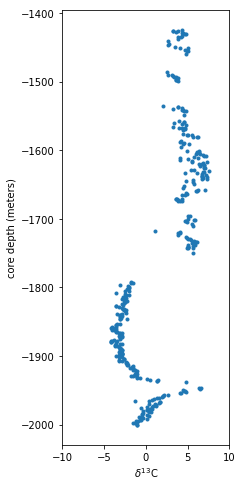

In [18]:
plt.figure(figsize=(3,8))
plt.scatter(BSF_data['d13C'],BSF_data['strat_m'],marker='.')
plt.xlim(-10,10)
plt.xlabel('$\delta^{13}\mathrm{C}$')
plt.ylabel('core depth (meters)')
plt.show()

In [19]:
BSF_data['age'] = 'NaN'
BSF_data['age'][0] = Fifteenmile_base-2
BSF_data['age'][64] = Fifteenmile_base-12
BSF_data['age'][65] = BSS_start
BSF_data['age'][250] = BSS_end
BSF_data['age'][472] = Ombombo_tuff

BSF_sed_rate1 = -(BSF_data['strat_m'][64]-BSF_data['strat_m'][0])/(BSF_data['age'][64]-BSF_data['age'][0])
BSF_sed_rate2 = -(BSF_data['strat_m'][250]-BSF_data['strat_m'][65])/(BSF_data['age'][250]-BSF_data['age'][65])
BSF_sed_rate3 = -(BSF_data['strat_m'][472]-BSF_data['strat_m'][250])/(BSF_data['age'][472]-BSF_data['age'][250])
print(BSF_sed_rate1, BSF_sed_rate2, BSF_sed_rate3)

5.1300000000000185 10.476510067114104 10.402266288951823


In [20]:
for n in range (1,64):
    meter_diff = BSF_data['strat_m'][n]-BSF_data['strat_m'][n-1]
    age_diff = (1/BSF_sed_rate1)*meter_diff
    BSF_data['age'][n]=BSF_data['age'][n-1]-age_diff
for n in range (66,250):
    meter_diff = BSF_data['strat_m'][n]-BSF_data['strat_m'][n-1]
    age_diff = (1/BSF_sed_rate2)*meter_diff
    BSF_data['age'][n]=BSF_data['age'][n-1]-age_diff
for n in range (251,472):
    meter_diff = BSF_data['strat_m'][n]-BSF_data['strat_m'][n-1]
    age_diff = (1/BSF_sed_rate3)*meter_diff
    BSF_data['age'][n]=BSF_data['age'][n-1]-age_diff
BSF_data.head()

,section,lithology,formation,strat_m,composite_strat,d13C,d18O,d13Corg,Dd13C,TOC%,age
0,W1,dolostone,Bitter Springs,-2000.9,-53.4,-1.0,-6.1,NaN,NaN,NaN,826
1,W1,dolostone,Bitter Springs,-2000.8,-53.3,-1.1,-4.9,NaN,NaN,NaN,825.981
2,W1,insoluble residue,Bitter Springs,-2000.7,-53.2,NaN,NaN,-27.6,26.5,NaN,825.961
3,W1,insoluble residue,Bitter Springs,-1999.5,-52.0,NaN,NaN,-28.7,27.2,NaN,825.727
4,W1,dolostone,Bitter Springs,-1997.6,-50.1,-1.3,-5.0,NaN,NaN,NaN,825.357


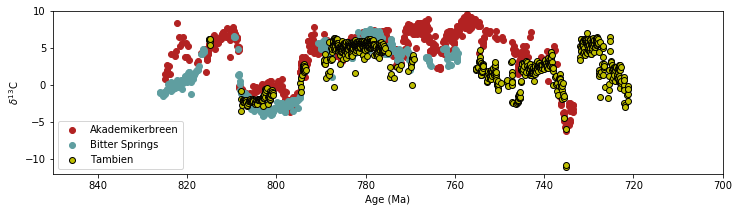

In [21]:
plt.figure(figsize=(12,3))
plt.scatter(Akadem_data['age'],Akadem_data['d13C'],
            c='Firebrick',label='Akademikerbreen')
plt.scatter(BSF_data['age'],BSF_data['d13C'],
            c='cadetblue',label='Bitter Springs')
plt.scatter(Tambien_data['age'],Tambien_data['d13C'], facecolor='y',
            edgecolor='k',label='Tambien')
plt.xlim(850,700)
plt.ylim(-12,10)
plt.ylabel('$\delta^{13}\mathrm{C}$')
plt.xlabel('Age (Ma)')
plt.legend(loc=3)
plt.show()

In [22]:
BSF_data.to_csv('Composite_Data/BitterSpringFm_ages.csv')

## Fifteenmile Group data (Macdonald et al., 2010)

Plot data against meter level and develop the age model for data from the Fifteenmile Group of northwest Canada published in:

Macdonald, F.A., Schmitz, M.D., Crowley, J.L., Roots, C.F., Jones, D.S., Maloof, A.C., Strauss, J.V., Cohen, P.A., Johnston, D.T., and Schrag, D.P., 2010, Calibrating the Cryogenian: Science, v. 327, p. 1241–1243, doi:10.1126 /science.1183325.

In [23]:
Fifteenmile_data = pd.read_csv('./Composite_Data/Fifteenmile.csv')
Fifteenmile_data.head()

,section,sample,formation,section_m,strat_m,d13C,d18O
0,F833,F833-1.0,PF1a,1.0,1.0,1.58,-5.67
1,F833,F833-2.6,PF1a,2.6,2.6,2.11,-4.82
2,F833,F833-3.2,PF1a,3.2,3.2,-0.13,-6.42
3,F833,F833-4.0,PF1a,4.0,4.0,-0.48,-6.07
4,F833,F833-5.0,PF1a,5.0,5.0,0.08,-6.35


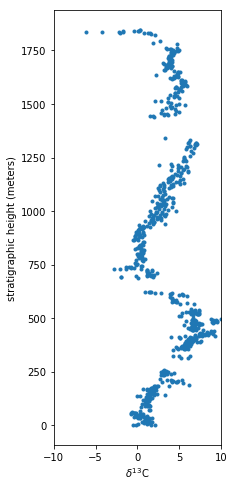

In [24]:
plt.figure(figsize=(3,8))
plt.scatter(Fifteenmile_data['d13C'],Fifteenmile_data['strat_m'],marker='.')
plt.xlim(-10,10)
plt.xlabel('$\delta^{13}\mathrm{C}$')
plt.ylabel('stratigraphic height (meters)')
plt.show()

In [25]:
Fifteenmile_data['age'] = 'NaN'
Fifteenmile_data['age'][0] = Fifteenmile_base
Fifteenmile_data['age'][329] = Fifteenmile_date
Fifteenmile_data['age'][457] = BSS_end
Fifteenmile_data['age'][596] = PF1_top
Fifteenmile_data['age'][597] = PF3_bottom
Fifteenmile_data['age'][736] = Islay_d13C_nadir+0.6

Fm_sed_rate1 = -(Fifteenmile_data['strat_m'][329]-Fifteenmile_data['strat_m'][0])/(Fifteenmile_data['age'][329]-Fifteenmile_data['age'][0])
Fm_sed_rate2 = -(Fifteenmile_data['strat_m'][457]-Fifteenmile_data['strat_m'][329])/(Fifteenmile_data['age'][457]-Fifteenmile_data['age'][329])
Fm_sed_rate3 = -(Fifteenmile_data['strat_m'][596]-Fifteenmile_data['strat_m'][457])/(Fifteenmile_data['age'][596]-Fifteenmile_data['age'][457])
Fm_sed_rate4 = -(Fifteenmile_data['strat_m'][736]-Fifteenmile_data['strat_m'][597])/(Fifteenmile_data['age'][736]-Fifteenmile_data['age'][597])
print(Fm_sed_rate1, Fm_sed_rate2, Fm_sed_rate3, Fm_sed_rate4)

32.72727272727273 23.627218934911273 16.207317073170717 23.247126436781638


In [26]:
for n in range (1,329):
    meter_diff = Fifteenmile_data['strat_m'][n]-Fifteenmile_data['strat_m'][n-1]
    age_diff = (1/Fm_sed_rate1)*meter_diff
    Fifteenmile_data['age'][n]=Fifteenmile_data['age'][n-1]-age_diff
for n in range (330,457):
    meter_diff = Fifteenmile_data['strat_m'][n]-Fifteenmile_data['strat_m'][n-1]
    age_diff = (1/Fm_sed_rate2)*meter_diff
    Fifteenmile_data['age'][n]=Fifteenmile_data['age'][n-1]-age_diff
for n in range (458,596):
    meter_diff = Fifteenmile_data['strat_m'][n]-Fifteenmile_data['strat_m'][n-1]
    age_diff = (1/Fm_sed_rate3)*meter_diff
    Fifteenmile_data['age'][n]=Fifteenmile_data['age'][n-1]-age_diff
for n in range (598,736):
    meter_diff = Fifteenmile_data['strat_m'][n]-Fifteenmile_data['strat_m'][n-1]
    age_diff = (1/Fm_sed_rate4)*meter_diff
    Fifteenmile_data['age'][n]=Fifteenmile_data['age'][n-1]-age_diff
Fifteenmile_data.head()

,section,sample,formation,section_m,strat_m,d13C,d18O,age
0,F833,F833-1.0,PF1a,1.0,1.0,1.58,-5.67,828
1,F833,F833-2.6,PF1a,2.6,2.6,2.11,-4.82,827.951
2,F833,F833-3.2,PF1a,3.2,3.2,-0.13,-6.42,827.933
3,F833,F833-4.0,PF1a,4.0,4.0,-0.48,-6.07,827.908
4,F833,F833-5.0,PF1a,5.0,5.0,0.08,-6.35,827.878


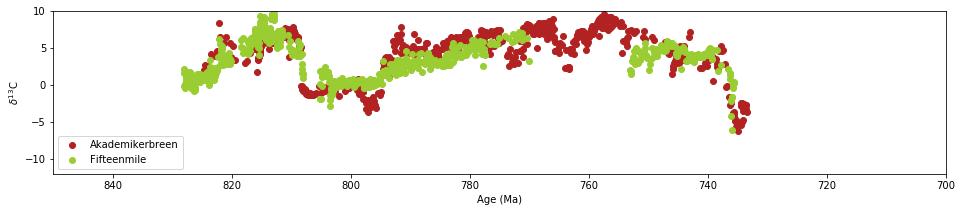

In [28]:
plt.figure(figsize=(16,3))
plt.scatter(Akadem_data['age'],Akadem_data['d13C'],
            c='Firebrick',label='Akademikerbreen')
plt.scatter(Fifteenmile_data['age'],Fifteenmile_data['d13C'],
            c='YellowGreen', label='Fifteenmile')
plt.xlim(850,700)
plt.ylim(-12,10)
plt.ylabel('$\delta^{13}\mathrm{C}$')
plt.xlabel('Age (Ma)')
plt.legend(loc=3)
plt.show()

In [29]:
Fifteenmile_data.to_csv('Composite_Data/Fifteenmile_ages.csv')

## Little Dal and Coates Lake groups (Halverson et al., 2006; Halverson et al., 2007d)

Plot data against meter level and develop the age model for data from the Little Dal and Coates Lake Groups of northwest Canada published in:

Halverson, G.P., 2006, A Neoproterozoic chronology, in Xiao, S., and Kaufman, A.J., eds., Neoproterozoic Geobiology and Paleobiology: New York, Springer, Topics in Geobiology, v. 27, p. 231–271.

Halverson, G.P., Dudás, F.O., Maloof, A.C., and Bowring, S.A., 2007, Evolution of the 87Sr/86Sr composition of Neoproterozoic seawater: Palaeogeography, Palaeoclimatology, Palaeoecology, v. 256, p. 103–129, doi: 10.1016/j.palaeo.2007.02.028.

In [30]:
LittleDal_data = pd.read_csv('./Composite_Data/LittleDal.csv')
LittleDal_data.head()

,section,sample,formation,section_strat,strat_m,d13C,d18O,87Sr/86Sr,87Sr/86Sr_filtered,Ba_ppm,Mn_ppm,Fe_ppm,Mg_ppm,Ca_ppm,Sr_ppm,Na_ppm,Mn/Sr,Mg/Ca
0,NaN,-,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P11A,P11A-3.2,Little Dal,3.2,3.2,0.40,-9.01,NaN,NaN,25.86,919.43,13447.92,58215.04,105115.34,49.31,403.66,29.74,0.91
2,P11A,P11A-4.7,Little Dal,4.7,4.7,0.88,-8.51,NaN,NaN,26.94,750.66,11029.81,49081.23,90907.85,42.62,341.69,28.09,0.89
3,P11A,P11A-8.3,Little Dal,8.3,8.3,0.55,-8.10,NaN,NaN,48.08,447.63,13197.55,33832.41,67991.62,33.52,270.88,21.30,0.82
4,P11A,P11A-9.1,Little Dal,9.1,9.1,0.48,-8.54,NaN,NaN,47.53,458.54,13891.15,33218.49,67233.24,34.77,275.34,21.04,0.81


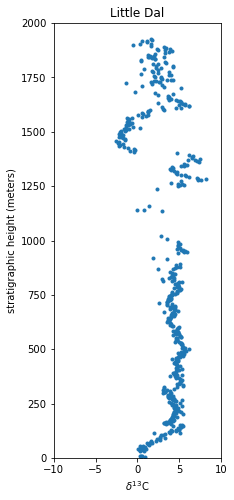

In [31]:
plt.figure(figsize=(3,8))
plt.scatter(LittleDal_data['d13C'],LittleDal_data['strat_m'],marker='.')
plt.xlim(-10,10)
plt.ylim(0,2000)
plt.xlabel('$\delta^{13}\mathrm{C}$')
plt.ylabel('stratigraphic height (meters)')
plt.title('Little Dal')
plt.show()

In [32]:
Little_Dal_base = 880
Little_Dal_top = 784

LittleDal_data['age'] = 'NaN'
LittleDal_data['age'][0] = Little_Dal_base
LittleDal_data['age'][371] = BSS_start
LittleDal_data['age'][415] = BSS_end
LittleDal_data['age'][519] = Little_Dal_top

LD_sed_rate1 = -(LittleDal_data['strat_m'][371]-LittleDal_data['strat_m'][0])/(LittleDal_data['age'][371]-LittleDal_data['age'][0])
LD_sed_rate2 = -(LittleDal_data['strat_m'][415]-LittleDal_data['strat_m'][371])/(LittleDal_data['age'][415]-LittleDal_data['age'][371])
LD_sed_rate3 = -(LittleDal_data['strat_m'][519]-LittleDal_data['strat_m'][415])/(LittleDal_data['age'][519]-LittleDal_data['age'][415])
print(LD_sed_rate1, LD_sed_rate2, LD_sed_rate3)

19.906382978723407 11.181208053691286 33.50943396226408


In [33]:
for n in range (1,371):
    meter_diff = LittleDal_data['strat_m'][n]-LittleDal_data['strat_m'][n-1]
    age_diff = (1/LD_sed_rate1)*meter_diff
    LittleDal_data['age'][n]=LittleDal_data['age'][n-1]-age_diff
for n in range (372,415):
    meter_diff = LittleDal_data['strat_m'][n]-LittleDal_data['strat_m'][n-1]
    age_diff = (1/LD_sed_rate2)*meter_diff
    LittleDal_data['age'][n]=LittleDal_data['age'][n-1]-age_diff
for n in range (416,519):
    meter_diff = LittleDal_data['strat_m'][n]-LittleDal_data['strat_m'][n-1]
    age_diff = (1/LD_sed_rate3)*meter_diff
    LittleDal_data['age'][n]=LittleDal_data['age'][n-1]-age_diff

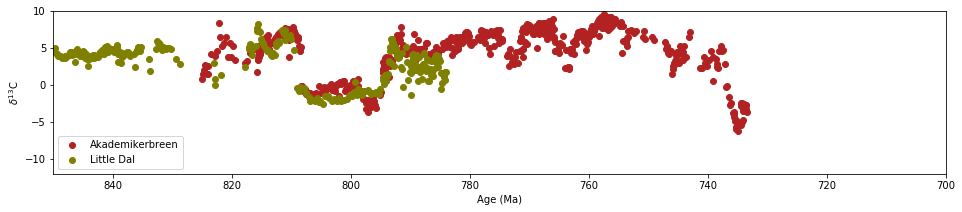

In [34]:
plt.figure(figsize=(16,3))
plt.scatter(Akadem_data['age'],Akadem_data['d13C'],
            c='Firebrick',label='Akademikerbreen')
plt.scatter(LittleDal_data['age'],LittleDal_data['d13C'],
            c='olive', label='Little Dal')
plt.xlim(850,700)
plt.ylim(-12,10)
plt.ylabel('$\delta^{13}\mathrm{C}$')
plt.xlabel('Age (Ma)')
plt.legend(loc=3)
plt.show()

In [35]:
LittleDal_data.to_csv('Composite_Data/LittleDal_ages.csv')

In [36]:
CoatesLake_data = pd.read_csv('./Composite_Data/CoatesLake_H06.csv')
CoatesLake_data.head()

,sample,formation,section_strat,strat_m,d13C,d18O,87Sr/86Sr,87Sr/86Sr_filtered,Ba_ppm,Mn_ppm,Fe_ppm,Mg_ppm,Ca_ppm,Sr_ppm,Na_ppm,Mn/Sr,Mg/Ca
0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,H119-68.3,Coates Lake,68.3,68.3,-6.06,-7.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H119-68.9,Coates Lake,68.9,68.9,-6.52,-8.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H119-69.5,Coates Lake,69.5,69.5,-6.98,-8.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,H119-70.3,Coates Lake,70.3,70.3,-7.31,-7.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


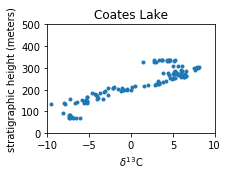

In [37]:
plt.figure(figsize=(3,2))
plt.scatter(CoatesLake_data['d13C'],CoatesLake_data['strat_m'],marker='.')
plt.xlim(-10,10)
plt.ylim(0,500)
plt.xlabel('$\delta^{13}\mathrm{C}$')
plt.ylabel('stratigraphic height (meters)')
plt.title('Coates Lake')
plt.show()

In [38]:
Coates_Lake_Base = 737

CoatesLake_data['age'] = 'NaN'
CoatesLake_data['age'][0] = Coates_Lake_Base
CoatesLake_data['age'][11] = Islay_d13C_nadir
CoatesLake_data['age'][49] = Islay_d13C_0
CoatesLake_data['age'][118] = Sturtian_initiation+8

CL_sed_rate1 = -(CoatesLake_data['strat_m'][11]-CoatesLake_data['strat_m'][0])/(CoatesLake_data['age'][11]-CoatesLake_data['age'][0])
CL_sed_rate2 = -(CoatesLake_data['strat_m'][49]-CoatesLake_data['strat_m'][11])/(CoatesLake_data['age'][49]-CoatesLake_data['age'][11])
CL_sed_rate3 = -(CoatesLake_data['strat_m'][118]-CoatesLake_data['strat_m'][49])/(CoatesLake_data['age'][118]-CoatesLake_data['age'][49])
print(CL_sed_rate1, CL_sed_rate2, CL_sed_rate3)

66.35 40.150000000000006 31.224999999999994


In [39]:
for n in range (1,11):
    meter_diff = CoatesLake_data['strat_m'][n]-CoatesLake_data['strat_m'][n-1]
    age_diff = (1/CL_sed_rate1)*meter_diff
    CoatesLake_data['age'][n]=CoatesLake_data['age'][n-1]-age_diff
for n in range (12,49):
    meter_diff = CoatesLake_data['strat_m'][n]-CoatesLake_data['strat_m'][n-1]
    age_diff = (1/CL_sed_rate2)*meter_diff
    CoatesLake_data['age'][n]=CoatesLake_data['age'][n-1]-age_diff
for n in range (50,118):
    meter_diff = CoatesLake_data['strat_m'][n]-CoatesLake_data['strat_m'][n-1]
    age_diff = (1/CL_sed_rate3)*meter_diff
    CoatesLake_data['age'][n]=CoatesLake_data['age'][n-1]-age_diff
CoatesLake_data.head()

,sample,formation,section_strat,strat_m,d13C,d18O,87Sr/86Sr,87Sr/86Sr_filtered,Ba_ppm,Mn_ppm,Fe_ppm,Mg_ppm,Ca_ppm,Sr_ppm,Na_ppm,Mn/Sr,Mg/Ca,age
0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,737
1,H119-68.3,Coates Lake,68.3,68.3,-6.06,-7.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735.971
2,H119-68.9,Coates Lake,68.9,68.9,-6.52,-8.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735.962
3,H119-69.5,Coates Lake,69.5,69.5,-6.98,-8.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735.953
4,H119-70.3,Coates Lake,70.3,70.3,-7.31,-7.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735.94


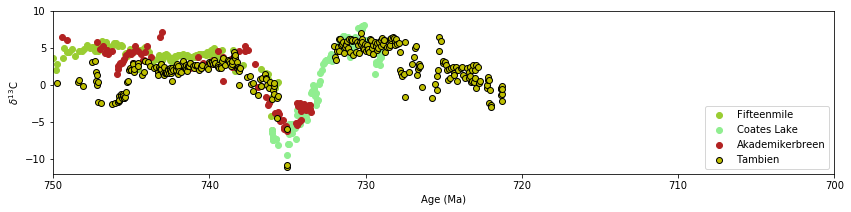

In [40]:
plt.figure(figsize=(14,3))
plt.scatter(Fifteenmile_data['age'],Fifteenmile_data['d13C'],
            c='YellowGreen', label='Fifteenmile')
plt.scatter(CoatesLake_data['age'],CoatesLake_data['d13C'],
            c='lightgreen', label='Coates Lake')
plt.scatter(Akadem_data['age'],Akadem_data['d13C'],
            c='Firebrick',label='Akademikerbreen')
plt.scatter(Tambien_data['age'],Tambien_data['d13C'], facecolor='y',
            edgecolor='k',label='Tambien')
plt.xlim(750,700)
plt.ylim(-12,10)
plt.ylabel('$\delta^{13}\mathrm{C}$')
plt.xlabel('Age (Ma)')
plt.legend(loc=4)
plt.show()

In [41]:
CoatesLake_data.to_csv('Composite_Data/CoatesLake_H06_ages.csv')

## Coates Lake Group (Coppercap Formation) data (Rooney et al., 2014)

Plot data against meter level and develop the age model for data from the Coopercap Formation of the Coates Lake Groups of northwest Canada published in:


In [42]:
Coppercap_data = pd.read_csv('./Composite_Data/CoatesLake_R14.csv')
Coppercap_data.head()

,section,sample,lithology,formation,strat_m,cumulative_thickness,d13C,d18O,87Sr/86Sr,Sr_ppm,carb_percent,87Sr/86Sr_filtered
0,6YR,125,gy micrite,Coppercap,97.5,97.5,-6.09,-6.17,0.71266,341.0,37.3,NaN
1,6YR,128,gy micrite,Coppercap,99.4,99.4,-4.42,-4.70,0.71688,157.0,79.3,NaN
2,6YR,129,gy micrite,Coppercap,124.1,124.1,-3.65,-5.01,0.71550,636.0,27.2,NaN
3,6YR,130,gy micrite,Coppercap,131.2,131.2,-5.10,-4.74,0.71178,NaN,NaN,NaN
4,6YR,123,dgy micrite,Coppercap,145.1,145.1,-4.94,-5.58,0.71324,NaN,NaN,NaN


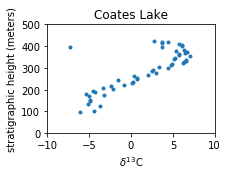

In [43]:
plt.figure(figsize=(3,2))
plt.scatter(Coppercap_data['d13C'],Coppercap_data['strat_m'],marker='.')
plt.xlim(-10,10)
plt.ylim(0,500)
plt.xlabel('$\delta^{13}\mathrm{C}$')
plt.ylabel('stratigraphic height (meters)')
plt.title('Coates Lake')
plt.show()

In [44]:
Coppercap_data['age'] = 'NaN'
Coppercap_data['age'][0] = Islay_d13C_nadir+1
Coppercap_data['age'][20] = Islay_d13C_0
Coppercap_data['age'][50] = Islay_d13C_0-3
CC_sed_rate1 = -(Coppercap_data['strat_m'][20]-Coppercap_data['strat_m'][0])/(Coppercap_data['age'][20]-Coppercap_data['age'][0])
CC_sed_rate2 = -(Coppercap_data['strat_m'][50]-Coppercap_data['strat_m'][20])/(Coppercap_data['age'][50]-Coppercap_data['age'][20])
print(CC_sed_rate1, CC_sed_rate2)

55.03333333333334 52.86666666666665


In [45]:
for n in range (1,20):
    meter_diff = Coppercap_data['strat_m'][n]-Coppercap_data['strat_m'][n-1]
    age_diff = (1/CC_sed_rate1)*meter_diff
    Coppercap_data['age'][n]=Coppercap_data['age'][n-1]-age_diff
for n in range (20,51):
    meter_diff = Coppercap_data['strat_m'][n]-Coppercap_data['strat_m'][n-1]
    age_diff = (1/CC_sed_rate2)*meter_diff
    Coppercap_data['age'][n]=Coppercap_data['age'][n-1]-age_diff    
Coppercap_data.head()

,section,sample,lithology,formation,strat_m,cumulative_thickness,d13C,d18O,87Sr/86Sr,Sr_ppm,carb_percent,87Sr/86Sr_filtered,age
0,6YR,125,gy micrite,Coppercap,97.5,97.5,-6.09,-6.17,0.71266,341.0,37.3,NaN,736
1,6YR,128,gy micrite,Coppercap,99.4,99.4,-4.42,-4.70,0.71688,157.0,79.3,NaN,735.965
2,6YR,129,gy micrite,Coppercap,124.1,124.1,-3.65,-5.01,0.71550,636.0,27.2,NaN,735.517
3,6YR,130,gy micrite,Coppercap,131.2,131.2,-5.10,-4.74,0.71178,NaN,NaN,NaN,735.388
4,6YR,123,dgy micrite,Coppercap,145.1,145.1,-4.94,-5.58,0.71324,NaN,NaN,NaN,735.135


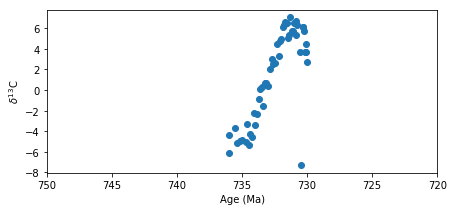

In [46]:
plt.figure(figsize=(7,3))
plt.scatter(Coppercap_data['age'],Coppercap_data['d13C'])
plt.xlim(750,720)
plt.ylabel('$\delta^{13}\mathrm{C}$')
plt.xlabel('Age (Ma)')
plt.show()

## Composite

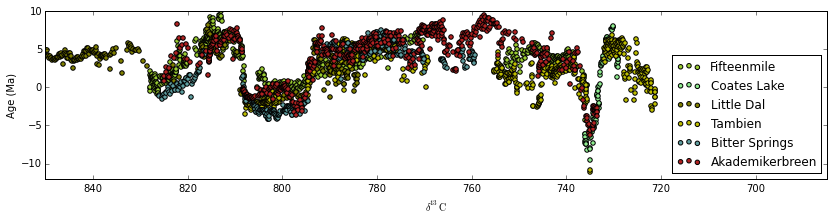

In [40]:
plt.figure(figsize=(14,3))
plt.scatter(Fifteenmile_data['age'],Fifteenmile_data['d13C'],
            c='YellowGreen', label='Fifteenmile')
plt.scatter(CoatesLake_data['age'],CoatesLake_data['d13C'],
            c='lightgreen', label='Coates Lake')
plt.scatter(LittleDal_data['age'],LittleDal_data['d13C'],
            c='olive', label='Little Dal')
plt.scatter(Tambien_data['age'],Tambien_data['d13C'], facecolor='y',
            edgecolor='k',label='Tambien')
plt.scatter(BSF_data['age'],BSF_data['d13C'],
            c='cadetblue',label='Bitter Springs')
plt.scatter(Akadem_data['age'],Akadem_data['d13C'],
            c='Firebrick',label='Akademikerbreen')
plt.xlim(850,685)
plt.ylim(-12,10)
plt.xlabel('$\delta^{13}\mathrm{C}$')
plt.ylabel('Age (Ma)')
plt.legend(loc=4)
plt.show()

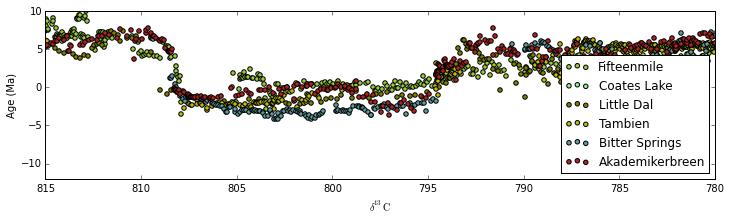

In [41]:
plt.figure(figsize=(12,3))
plt.scatter(Fifteenmile_data['age'],Fifteenmile_data['d13C'],
            c='YellowGreen', label='Fifteenmile')
plt.scatter(CoatesLake_data['age'],CoatesLake_data['d13C'],
            c='lightgreen', label='Coates Lake')
plt.scatter(LittleDal_data['age'],LittleDal_data['d13C'],
            c='olive', label='Little Dal')
plt.scatter(Tambien_data['age'],Tambien_data['d13C'], facecolor='y',
            edgecolor='k',label='Tambien')
plt.scatter(BSF_data['age'],BSF_data['d13C'],
            c='cadetblue',label='Bitter Springs')
plt.scatter(Akadem_data['age'],Akadem_data['d13C'],
            c='Firebrick',label='Akademikerbreen')
plt.xlim(815,780)
plt.ylim(-12,10)
plt.xlabel('$\delta^{13}\mathrm{C}$')
plt.ylabel('Age (Ma)')
plt.legend(loc=4)
plt.show()

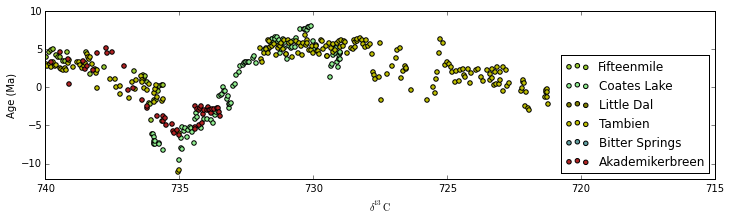

In [42]:
plt.figure(figsize=(12,3))
plt.scatter(Fifteenmile_data['age'],Fifteenmile_data['d13C'],
            c='YellowGreen', label='Fifteenmile')
plt.scatter(CoatesLake_data['age'],CoatesLake_data['d13C'],
            c='lightgreen', label='Coates Lake')
plt.scatter(LittleDal_data['age'],LittleDal_data['d13C'],
            c='olive', label='Little Dal')
plt.scatter(Tambien_data['age'],Tambien_data['d13C'], facecolor='y',
            edgecolor='k',label='Tambien')
plt.scatter(BSF_data['age'],BSF_data['d13C'],
            c='cadetblue',label='Bitter Springs')
plt.scatter(Akadem_data['age'],Akadem_data['d13C'],
            c='Firebrick',label='Akademikerbreen')
plt.xlim(740,715)
plt.ylim(-12,10)
plt.xlabel('$\delta^{13}\mathrm{C}$')
plt.ylabel('Age (Ma)')
plt.legend(loc=4)
plt.show()

### Version used for Figure 2c panel

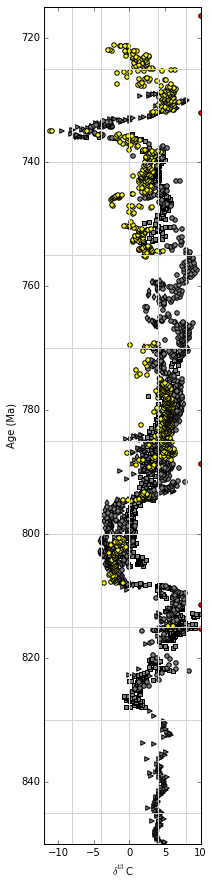

In [43]:
plt.figure(figsize=(2.81,15))
plt.vlines(-8,-1000,5000,color='lightgrey')
plt.vlines(-4,-1000,5000,color='lightgrey')
plt.vlines(0,-1000,5000,color='lightgrey')
plt.vlines(4,-1000,5000,color='lightgrey')
plt.vlines(8,-1000,5000,color='lightgrey')
plt.hlines(725,-12,10,color='lightgrey')
plt.hlines(740,-12,10,color='lightgrey')
plt.hlines(755,-12,10,color='lightgrey')
plt.hlines(770,-12,10,color='lightgrey')
plt.hlines(785,-12,10,color='lightgrey')
plt.hlines(800,-12,10,color='lightgrey')
plt.hlines(815,-12,10,color='lightgrey')
plt.hlines(830,-12,10,color='lightgrey')
plt.hlines(845,-12,10,color='lightgrey')
plt.scatter(BSF_data['d13C'][65:472],BSF_data['age'][65:472],c='grey',marker='d')
plt.scatter(Fifteenmile_data['d13C'],Fifteenmile_data['age'],c='grey',marker='s')
plt.scatter(LittleDal_data['d13C'],LittleDal_data['age'],c='grey',marker='>')
plt.scatter(CoatesLake_data['d13C'],CoatesLake_data['age'],c='grey',marker='>')
plt.scatter(Akadem_data['d13C'],Akadem_data['age'],c='grey',marker='o')
plt.scatter(Tambien_data['d13C'],Tambien_data['age'], facecolor='yellow',edgecolor='k',marker='o')
plt.scatter(10,815.29,c='r')
plt.scatter(10,811.51,c='r')
plt.scatter(10,788.72,c='r')
plt.scatter(10,732.2,c='r')
plt.scatter(10,716.47,c='r')
plt.ylim(850,715)
plt.xlim(-12,10)
plt.ylabel('Age (Ma)')
plt.xlabel('$\delta^{13}$C')
plt.savefig('Tonian_Composite.pdf')
plt.show()

Tambien Group
Akademikerbreen Group
Bitter Springs Formation
Fifteenmile Group
Little Dal
Coates Lake
Coppercap